# Heart Disease Detection Using Machine Learning Algorithm

In this notebook we will use 4 machine learning algorithm viz. SVM, K-NN, Decision Tree and Logistic Regression to predict if a patient posses heart disease or not.

<html>
    <body>
        <h3>Developers information - </h3>
        <div>
            <h4>College Name - B.P. Poddar Institute of Management and Technology, Kolkata, West Bengal</h4>
            <h5>Department - Computer Science and Engineering</h5>
            <h5>Section - A</h5>
        </div>
        <table>
            <tr>
                <th>Name</th>
                <th>University Roll</th>
            </tr>
            <tr>
                <td>Dipanjan Maity</td>
                <td>11500117113</td>
            </tr>
            <tr>
                <td>Jiban Barman</td>
                <td>11500117105</td>
            </tr>
            <tr>
                <td>Dwaipayan Dinda</td>
                <td>11500117111</td>
            </tr>
            <tr>
                <td>Akash Roy</td>
                <td>11500117138</td>
            </tr>
        </table>
    </body>
</html>

#### Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

## About Dataset
This dataset is about previous patients. The <strong>Heart_Disease_Prediction.csv</strong> data set includes details of 270 patients whose heart condition are already analized. It includes following fields:

<html>
    <body>
        <table align="center">
            <thead>
                <tr align="center">
                    <th>Field</th>
                    <th>Description</th>
                </tr>
            </thead>
            <tbody>
                <tr align="center">
                    <td>Age</td>
                    <td>Describes the age of the patient in years</td>
                </tr>
                <tr align="center">
                    <td>Sex</td>
                    <td>Describes the gender of the patient (1 = male; 0 = female)</td>
                </tr>
                <tr align="center">
                    <td>Chest pain type</td>
                    <td>
                        1. typical angina<br>
                        2. atypical angina<br>
                        3. non-anginal pain<br>
                        4. asymptomatic<br>
                    </td>
                </tr>
                <tr align="center">
                    <td>BP</td>
                    <td>The patient's resting blood pressure (mm Hg on admission to the hospital)</td>
                </tr>
                <tr align="center">
                    <td>Cholesterol</td>
                    <td>serum cholestoral in mg/dl</td>
                </tr>
                <tr align="center">
                    <td>FBS over 120</td>
                    <td>(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</td>
                </tr>
                <tr align="center">
                    <td>EKG results</td>
                    <td>Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)</td>
                </tr>
                <tr align="center">
                    <td>Max HR</td>
                    <td>The person's maximum heart rate achieved</td>
                </tr>
                <tr align="center">
                    <td>Exercise angina</td>
                    <td>Exercise induced angina (1 = yes; 0 = no)</td>
                </tr>
                <tr align="center">
                    <td>ST depression</td>
                    <td>ST depression induced by exercise relative to rest </td>
                </tr>
                <tr align="center">
                    <td>Slope of ST</td>
                    <td>the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)</td>
                </tr>
                <tr align="center">
                    <td>Number of vessels fluro</td>
                    <td>The number of major vessels (0-3)</td>
                </tr>
                <tr align="center">
                    <td>Thallium</td>
                    <td>A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)</td>
                </tr>
                <tr align="center">
                    <td>Heart Disease</td>
                    <td>Heart disease (0 = Absence, 1 = Presence)</td>
                </tr>
            </tbody>
        </table>
    </body>
</html>

## Load Data From CSV File

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.shape

(270, 14)

In [4]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

120 patients are having heart disease and 150 patients are normal

Lets get some insight of the dataset :

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## pandas-profiling

In [6]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [7]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Lets plot some columns to underestand data better:

In [8]:
import seaborn as sns

## Age wise positive case for both gender
#### 0 - female , 1 - male

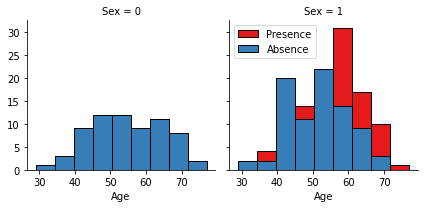

In [9]:
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Heart Disease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## BP wise positive case for both gender 

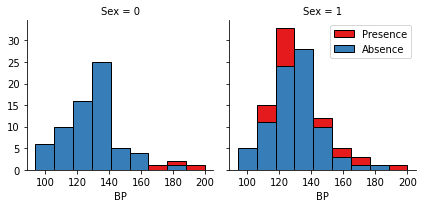

In [10]:
bins = np.linspace(df.BP.min(), df.BP.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Heart Disease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'BP', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## MAX HR wise positive case for both gender

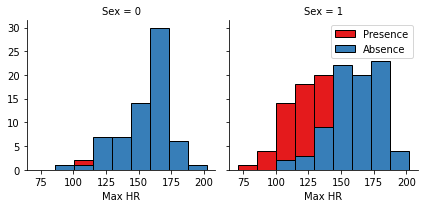

In [11]:
bins = np.linspace(df['Max HR'].min(), df['Max HR'].max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Heart Disease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Max HR', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## ST depression wise positive case for both gender

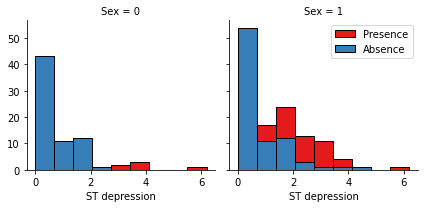

In [12]:
bins = np.linspace(df['ST depression'].min(), df['ST depression'].max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Heart Disease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ST depression', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Dependency of target on categorial features

#### Lets look at gender:

In [13]:
df.groupby(['Sex'])['Heart Disease'].value_counts(normalize=True)

Sex  Heart Disease
0    Absence          0.770115
     Presence         0.229885
1    Presence         0.546448
     Absence          0.453552
Name: Heart Disease, dtype: float64

We can see that only ~ 23% females have heart disease but ~54.6% males have heart disease

#### Lets look at effect of Chest pain type on target :

In [14]:
df.groupby(['Chest pain type'])['Heart Disease'].value_counts(normalize=True)

Chest pain type  Heart Disease
1                Absence          0.750000
                 Presence         0.250000
2                Absence          0.833333
                 Presence         0.166667
3                Absence          0.784810
                 Presence         0.215190
4                Presence         0.705426
                 Absence          0.294574
Name: Heart Disease, dtype: float64

#### Lets have a look at the effect of FBS over 120 on target

In [15]:
df.groupby(['FBS over 120'])['Heart Disease'].value_counts(normalize=True)

FBS over 120  Heart Disease
0             Absence          0.552174
              Presence         0.447826
1             Absence          0.575000
              Presence         0.425000
Name: Heart Disease, dtype: float64

#### Lets look at EKG results

In [16]:
df.groupby(['EKG results'])['Heart Disease'].value_counts(normalize=True)

EKG results  Heart Disease
0            Absence          0.648855
             Presence         0.351145
1            Absence          0.500000
             Presence         0.500000
2            Presence         0.532847
             Absence          0.467153
Name: Heart Disease, dtype: float64

#### Lets have a look at the effect of Exercise angina on target

In [17]:
df.groupby(['Exercise angina'])['Heart Disease'].value_counts(normalize=True)

Exercise angina  Heart Disease
0                Absence          0.701657
                 Presence         0.298343
1                Presence         0.741573
                 Absence          0.258427
Name: Heart Disease, dtype: float64

#### Lets have a look at the effect of Slope of ST on target

In [18]:
df.groupby(['Slope of ST'])['Heart Disease'].value_counts(normalize=True)

Slope of ST  Heart Disease
1            Absence          0.753846
             Presence         0.246154
2            Presence         0.639344
             Absence          0.360656
3            Presence         0.555556
             Absence          0.444444
Name: Heart Disease, dtype: float64

#### Lets have a look at the effect of Number of vessels fluro on target

In [19]:
df.groupby(['Number of vessels fluro'])['Heart Disease'].value_counts(normalize=True)

Number of vessels fluro  Heart Disease
0                        Absence          0.750000
                         Presence         0.250000
1                        Presence         0.655172
                         Absence          0.344828
2                        Presence         0.787879
                         Absence          0.212121
3                        Presence         0.842105
                         Absence          0.157895
Name: Heart Disease, dtype: float64

#### Lets have a look at the effect of Thallium on target

In [20]:
df.groupby(['Thallium'])['Heart Disease'].value_counts(normalize=True)

Thallium  Heart Disease
3         Absence          0.782895
          Presence         0.217105
6         Presence         0.571429
          Absence          0.428571
7         Presence         0.759615
          Absence          0.240385
Name: Heart Disease, dtype: float64

## Pre-processing: Feature selection/extraction

### Feature Selection

#### Univariate Selction — 
Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 13 of the best features from the Dataset.

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Copying the data so that we can perform some operation on it without affecting original data
data = df.copy()

X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print best features

                      Specs       Score
7                    Max HR  168.929831
11  Number of vessels fluro   74.122652
12                 Thallium   59.463091
9             ST depression   58.697286
4               Cholesterol   40.093093
8           Exercise angina   31.822472
0                       Age   18.485273
3                        BP   15.775632
2           Chest pain type   13.330455
6               EKG results    8.688587
1                       Sex    7.711475
10              Slope of ST    7.301402
5              FBS over 120    0.061250


#### Feature Importance — 
You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top features for the dataset.

[0.07060854 0.04758294 0.1010822  0.06383943 0.06815255 0.01841114
 0.03536437 0.08087087 0.08734811 0.08060954 0.05933022 0.11904213
 0.16775796]


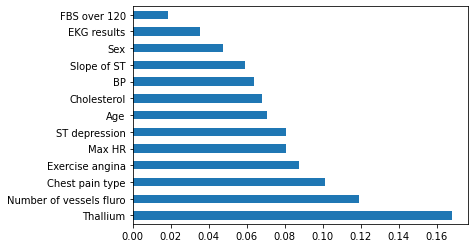

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

#### Correlation Matrix with Heatmap — 
Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

Correlation shows whether the characteristics are related to each other or to the target variable. Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased). From this heatmap we can observe that the 'ST depression' and 'Slope of ST' is highly related to the target variable. Compared to relation between other two variables we can say that 'ST depression' and 'Slope of ST' contributes the most in prediction of presences of a heart disease.

<AxesSubplot:>

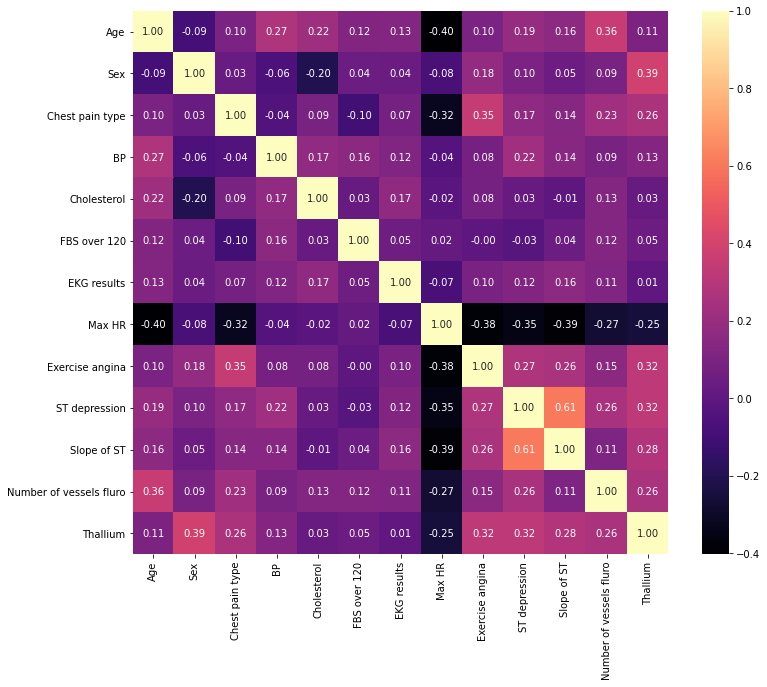

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

# Selected features

In [24]:
# Feature = df[['Thallium','Number of vessels fluro','ST depression','Slope of ST','Exercise angina','Chest pain type','Age','Sex','BP']]
Feature = df[['Thallium','Number of vessels fluro','ST depression','Exercise angina','Chest pain type','Age','Sex','BP']]
Feature.head()

,Thallium,Number of vessels fluro,ST depression,Exercise angina,Chest pain type,Age,Sex,BP
0,3,3,2.4,0,4,70,1,130
1,7,0,1.6,0,3,67,0,115
2,7,0,0.3,0,2,57,1,124
3,7,1,0.2,1,4,64,1,128
4,3,1,0.2,1,2,74,0,120


In [25]:
X = Feature
X[0:5]

,Thallium,Number of vessels fluro,ST depression,Exercise angina,Chest pain type,Age,Sex,BP
0,3,3,2.4,0,4,70,1,130
1,7,0,1.6,0,3,67,0,115
2,7,0,0.3,0,2,57,1,124
3,7,1,0.2,1,4,64,1,128
4,3,1,0.2,1,2,74,0,120


In [26]:
y = df['Heart Disease'].values
y[0:5]

array(['Presence', 'Absence', 'Presence', 'Absence', 'Absence'],
      dtype=object)

### Splitting of train and test data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (216, 8) (216,)
Test set: (54, 8) (54,)


## Normalize Data
Data Standardization give data zero mean and unit variance (should be done after train test split )

In [28]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

array([[-0.88906598,  0.3271174 , -0.48104507, -0.68511879, -0.17307444,
        -0.01868932,  0.67783439, -0.35190123],
       [-0.88906598,  0.3271174 ,  0.97878757,  1.4596009 ,  0.89504211,
         1.04365104,  0.67783439, -0.64135541],
       [ 0.6554776 , -0.72747004,  1.06466008, -0.68511879, -2.30930754,
         0.93741701,  0.67783439,  0.80591547],
       [-0.88906598, -0.72747004,  0.80704255, -0.68511879, -0.17307444,
        -1.39973179,  0.67783439, -0.06244706],
       [-0.88906598,  0.3271174 , -0.65279008, -0.68511879, -0.17307444,
        -1.08102968, -1.47528661, -0.75713708]])

In [29]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[-0.82369136, -0.64888568, -0.959345  , -0.76696499, -1.22983739,
        -1.90596116, -1.35724179, -0.32267136],
       [ 1.26945375,  1.5411035 , -0.00880133,  1.30384048,  0.78262379,
         1.38859398, -1.35724179,  2.29600254],
       [-0.82369136, -0.64888568, -0.1038557 , -0.76696499, -2.23606798,
         0.59790075, -1.35724179,  0.88594736],
       [-0.82369136, -0.64888568, -0.00880133, -0.76696499,  0.78262379,
         1.52037619,  0.7367884 , -0.62482604],
       [ 1.26945375, -0.64888568, -0.19891006,  1.30384048,  0.78262379,
         0.33433634,  0.7367884 ,  0.88594736]])

In [30]:
y_train[0:5]

array(['Absence', 'Presence', 'Absence', 'Absence', 'Absence'],
      dtype=object)

In [31]:
y_test[0:5]

array(['Absence', 'Presence', 'Absence', 'Presence', 'Presence'],
      dtype=object)

# Classification

Algorithms - 
<ul>
    <li>K Nearest Neighbor(KNN)</li>
    <li>Decision Tree</li>
    <li>Support Vector Machine</li>
    <li>Logistic Regression</li>
</ul>

# K Nearest Neighbor(KNN)

[0.68518519 0.66666667 0.72222222 0.72222222 0.72222222 0.72222222
 0.74074074 0.72222222 0.75925926 0.72222222 0.72222222 0.74074074
 0.75925926 0.72222222]


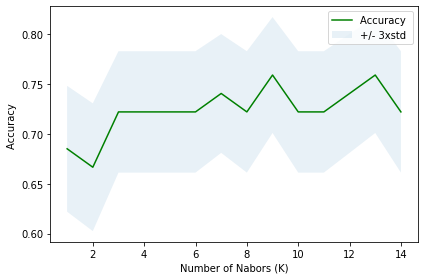

The best accuracy was with 0.7593 with k= 9


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with %.4f" % mean_acc.max(), "with k=", mean_acc.argmax()+1)

## Accuracy evaluation

In [33]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

# Train Model and Predict
k = 9

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat = neigh.predict(X_test)

print("Train set Accuracy: %.4f" % metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: %.4f" % metrics.accuracy_score(y_test, yhat))

print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("jaccard_score: %.4f" % jaccard_score(y_test, yhat, pos_label = "Presence"))

Train set Accuracy: 0.8935
Test set Accuracy: 0.7593
Avg F1-score: 0.7563
jaccard_score: 0.5806


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

predTree = DecisionTreeClassifier()
print(predTree) # it shows the default parameters
predTree.fit(X_train,y_train)

y_hat = predTree.predict(X_test)

print("DecisionTrees's training Accuracy: %.4f" % metrics.accuracy_score(y_train, predTree.predict(X_train)))
print("DecisionTrees's testing Accuracy: %.4f" % metrics.accuracy_score(y_test, y_hat))

print("Avg F1-score: %.4f" % f1_score(y_test, y_hat, average='weighted'))
print("jaccard_score: %.4f" % jaccard_score(y_test, y_hat, pos_label="Presence"))

DecisionTreeClassifier()
DecisionTrees's training Accuracy: 1.0000
DecisionTrees's testing Accuracy: 0.7037
Avg F1-score: 0.7013
jaccard_score: 0.5152


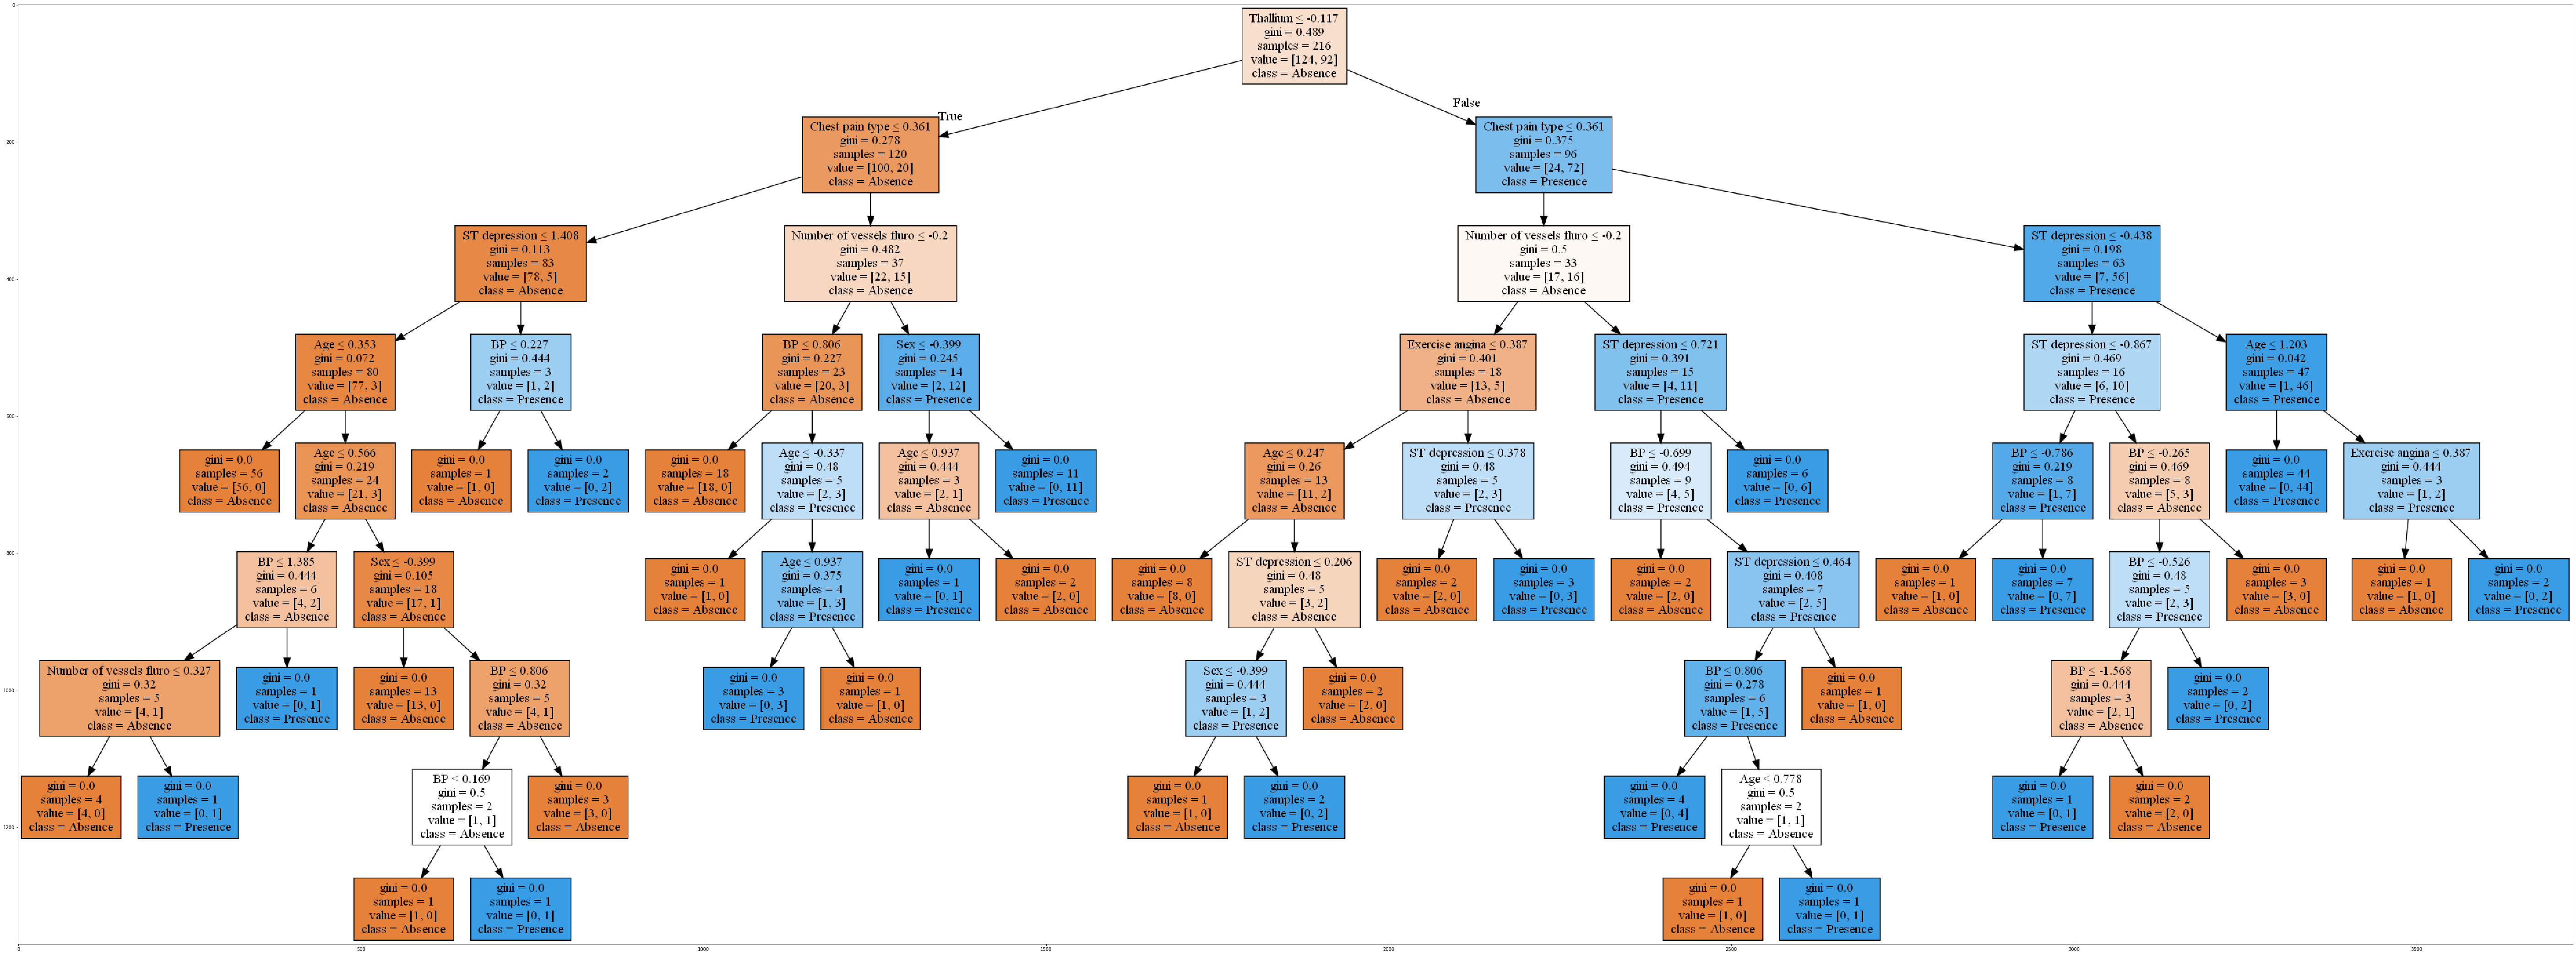

In [35]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "Heart_disease.png"
featureNames = Feature.columns[0:]
targetNames = df['Heart Disease'].unique().tolist()
out=tree.export_graphviz(predTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

['Absence' 'Presence' 'Absence' 'Absence' 'Presence']
              precision    recall  f1-score   support

     Absence       0.69      0.85      0.76        26
    Presence       0.82      0.64      0.72        28

    accuracy                           0.74        54
   macro avg       0.75      0.74      0.74        54
weighted avg       0.76      0.74      0.74        54

Confusion matrix, without normalization
[[22  4]
 [10 18]]


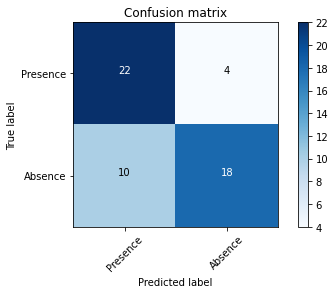

SVC's(kernel = rbf) training Accuracy: 0.9213
SVC's(kernel = rbf) testing Accuracy: 0.7407
Avg F1-score: 0.7386
jaccard_score: 0.5625


In [36]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
print(yhat[0:5])

from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Presence','Absence'],normalize= False,  title='Confusion matrix')
plt.show()

print("SVC's(kernel = rbf) training Accuracy: %.4f" % metrics.accuracy_score(y_train, clf.predict(X_train)))
print("SVC's(kernel = rbf) testing Accuracy: %.4f" % metrics.accuracy_score(y_test, yhat))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("jaccard_score: %.4f" % jaccard_score(y_test, yhat, pos_label="Presence"))

In [37]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)

print("SVC's(kernel = linear) training Accuracy: %.4f" % metrics.accuracy_score(y_train, clf2.predict(X_train)))
print("SVC's(kernel = linear) testing Accuracy: %.4f" % metrics.accuracy_score(y_test, yhat2))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("jaccard_score: %.4f" % jaccard_score(y_test, yhat2, pos_label="Presence"))

SVC's(kernel = linear) training Accuracy: 0.8704
SVC's(kernel = linear) testing Accuracy: 0.7037
Avg F1-score: 0.6988
jaccard_score: 0.5000


# Logistic Regression

LogisticRegression(C=0.01, solver='liblinear')
[[22  4]
 [11 17]]
Confusion matrix, without normalization
[[22  4]
 [11 17]]


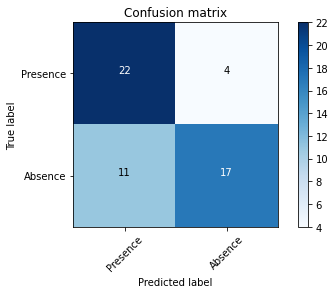

              precision    recall  f1-score   support

     Absence       0.67      0.85      0.75        26
    Presence       0.81      0.61      0.69        28

    accuracy                           0.72        54
   macro avg       0.74      0.73      0.72        54
weighted avg       0.74      0.72      0.72        54



In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(LR)

yhat = LR.predict(X_test)
yhat[0:5]

yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

print(confusion_matrix(y_test, yhat))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Presence','Absence'],normalize= False,  title='Confusion matrix')
plt.show()

print (classification_report(y_test, yhat))

In [39]:
from sklearn.metrics import log_loss

print("Logistic Regression's(solver = liblinear) training Accuracy: %.4f" % metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Logistic Regression's(solver = liblinear) testing Accuracy: %.4f" % metrics.accuracy_score(y_test, yhat))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("jaccard_score: %.4f" % jaccard_score(y_test, yhat, pos_label="Presence"))
print("LogLoss: %.4f" % log_loss(y_test, yhat_prob))

Logistic Regression's(solver = liblinear) training Accuracy: 0.8796
Logistic Regression's(solver = liblinear) testing Accuracy: 0.7222
Avg F1-score: 0.7189
jaccard_score: 0.5312
LogLoss: 0.5385


In [40]:
LR2 = LogisticRegression(C=0.05, solver='sag').fit(X_train,y_train)
yhat_2 = LR2.predict(X_test)
yhat_prob2 = LR2.predict_proba(X_test)

print("Logistic Regression's(solver = sag) training Accuracy: %.4f" % metrics.accuracy_score(y_train, LR2.predict(X_train)))
print("Logistic Regression's(solver = sag) testing Accuracy: %.4f" % metrics.accuracy_score(y_test, yhat_2))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_2, average='weighted'))
print("jaccard_score: %.4f" % jaccard_score(y_test, yhat_2, pos_label="Presence"))
print ("LogLoss: %.4f" % log_loss(y_test, yhat_prob2))

Logistic Regression's(solver = sag) training Accuracy: 0.8611
Logistic Regression's(solver = sag) testing Accuracy: 0.7222
Avg F1-score: 0.7189
jaccard_score: 0.5312
LogLoss: 0.5409


# Report

<table>
    <tr>
        <th>Algorithm</th>
        <th>Jaccard</th>
        <th>F1-score</th>
        <th>LogLoss</th>
    </tr>
    <tr>
        <td>KNN(K=9)</td>
        <td>0.5806</td>
        <td>0.7563</td>
        <td>NA</td>
    </tr>
    <tr>
        <td>Decision Tree</td>
        <td>0.4848</td>
        <td>0.6814</td>
        <td>NA</td>
    </tr>
    <tr>
        <td>
            SVM
            <ol>
                <li>Kernel = rbf</li>
                <li>Kernel = linear</li>
            </ol>
        </td>
        <td>
            <ol>
                <li>0.5625</li>
                <li>0.5000</li>
            </ol>
        </td>
        <td>
            <ol>
                <li>0.7386</li>
                <li>0.6988</li>
            </ol>
        </td>
        <td>
            <ol>
                <li>NA</li>
                <li>NA</li>
            </ol>
        </td>
    </tr>
    <tr>
        <td>
            LogisticRegression
            <ol>
                <li>solver = liblinear</li>
                <li>solver = sag</li>
            </ol>
        </td>
        <td>
            <ol>
                <li>0.5312</li>
                <li>0.5312</li>
            </ol>
        </td>
        <td>
            <ol>
                <li>0.7189</li>
                <li>0.7189</li>
            </ol>
        </td>
        <td>
            <ol>
                <li>0.5385</li>
                <li>0.5410</li>
            </ol>
        </td>
    </tr>
</table>